# Análisis de datos de la pandemia de covid-19 en la Ciudad de México

En este proyecto, presento algunos análisis y visualizaciones de datos sobre la pandemia de Covid-19 en la Ciudad de México. Me concentro únicamente (por facilidad) en datos sobre personas con una prueba de laboratorio positiva (no antígeno).

La base de datos es la de la Secretaría de Salud y puede ser consultada en su portal. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 50

In [2]:
import covid_data # Código propio para cargar y leer la base de datos de la SSA

fecha = "210927"
covid_data.descarga_base_covid(fecha)

La base de datos se encuentra en la carpeta


In [3]:
datos = covid_data.lee_base_covid(fecha)

C:\Users\berto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


La base de datos tardó en cargarse 49.61754631996155 segundos


In [4]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-09-27,z482b8,2,12,9,2,9,9,12,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,1,99,México,97,97
1,2021-09-27,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,México,97,1
2,2021-09-27,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2,97,2,97,6,99,México,97,97
3,2021-09-27,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,9999-99-99,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
4,2021-09-27,zz8e77,2,12,9,2,9,9,2,1,2020-04-16,2020-04-10,9999-99-99,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97


In [5]:
datos.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

Selecciono solo algunas columnas del conjunto de datos para estudiarlas. Entre estas columnas, selecciono las asociadas a fechas y de comorbilidades.

In [6]:
datos_covid = datos[datos['ENTIDAD_RES']==9] # Ciudad de México

columnas = ['MUNICIPIO_RES', 'SEXO', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'EMBARAZO','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', "CLASIFICACION_FINAL"]

datos_covid = datos_covid[columnas]
datos_covid = datos_covid[datos_covid['CLASIFICACION_FINAL']==3] # Casos positivos (véase el catálogo de clasificación final)

In [7]:
datos_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791418 entries, 15 to 10568946
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   MUNICIPIO_RES        791418 non-null  int64 
 1   SEXO                 791418 non-null  int64 
 2   TIPO_PACIENTE        791418 non-null  int64 
 3   FECHA_INGRESO        791418 non-null  object
 4   FECHA_SINTOMAS       791418 non-null  object
 5   FECHA_DEF            791418 non-null  object
 6   INTUBADO             791418 non-null  int64 
 7   NEUMONIA             791418 non-null  int64 
 8   EDAD                 791418 non-null  int64 
 9   EMBARAZO             791418 non-null  int64 
 10  DIABETES             791418 non-null  int64 
 11  EPOC                 791418 non-null  int64 
 12  ASMA                 791418 non-null  int64 
 13  INMUSUPR             791418 non-null  int64 
 14  HIPERTENSION         791418 non-null  int64 
 15  OTRA_COM             791418 non

## Limpieza de datos

Primero realizaré limpieza de datos. Convertiré algunas columnas a tipos más sencillos con los que trabajar y añadiré unas cuantas columnas extras que serán de utilidad.

In [8]:
datos_covid["FECHA_INGRESO"] = pd.to_datetime(datos_covid["FECHA_INGRESO"])
datos_covid["FECHA_SINTOMAS"] = pd.to_datetime(datos_covid["FECHA_SINTOMAS"])

La columna "FECHA_DEF" tiene entradas nulas que están escritas en el formato "9999-99-99". Convertiré estas entradas a unas que la función pd.to_datetime entienda y cuando no las necesite en análisis posteriores, simplemente omitiré estas entradas.

In [9]:
def defuncion(fecha):
    """
    Una función que clasifica si una persona falleció o no
    """
    if fecha == "9999-99-99":
        d = 0
    else:
        d = 1
    return d

def fecha_nula(fecha):
    """
    Una función para checar fechas nulas en la columna de fecha de defunción
    """
    if fecha == "9999-99-99":
        fecha = "1999-01-01"
    return fecha

In [10]:
datos_covid["DEF"] = datos_covid["FECHA_DEF"].apply(defuncion)
datos_covid["FECHA_DEF"] = datos_covid["FECHA_DEF"].apply(fecha_nula)
datos_covid["FECHA_DEF"] = pd.to_datetime(datos_covid["FECHA_DEF"])

In [11]:
datos_covid["SINTOMAS_INGRESO"] = datos_covid.FECHA_INGRESO - datos_covid.FECHA_SINTOMAS
datos_covid["SINTOMAS_DEF"] = datos_covid.FECHA_DEF - datos_covid.FECHA_SINTOMAS
datos_covid["INGRESO_DEF"] = datos_covid.FECHA_DEF - datos_covid.FECHA_INGRESO

In [12]:
datos_covid.reset_index(inplace=True, drop=True)
datos_covid.head()

,MUNICIPIO_RES,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,DEF,SINTOMAS_INGRESO,SINTOMAS_DEF,INGRESO_DEF
0,6,1,1,2020-09-08,2020-09-03,1999-01-01,97,2,26,2,2,2,2,2,2,2,2,2,2,2,3,0,5 days,-7916 days,-7921 days
1,5,1,1,2020-04-22,2020-04-20,1999-01-01,97,2,45,2,2,2,2,2,2,2,2,1,2,2,3,0,2 days,-7780 days,-7782 days
2,12,1,1,2020-12-21,2020-12-18,1999-01-01,97,2,62,2,2,2,2,2,1,2,2,1,2,2,3,0,3 days,-8022 days,-8025 days
3,4,1,1,2020-09-23,2020-09-23,1999-01-01,97,2,67,2,1,2,2,2,2,2,2,2,2,2,3,0,0 days,-7936 days,-7936 days
4,6,1,1,2021-08-28,2021-08-28,1999-01-01,97,2,71,2,1,2,2,2,2,2,2,2,2,2,3,0,0 days,-8275 days,-8275 days


In [13]:
def si_no(x):
    """
    Función que modifica las columnas que corresponden a una descripción "SI_NO" 
    del catálogo de la SSA (consultar catálogo y descriptores)
    """
    if x <= 2:
        x = np.abs(x-2)
    return x

In [14]:
columnas_si_no = ['INTUBADO', 'NEUMONIA', 'EMBARAZO','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
for columna in columnas_si_no:
    datos_covid[columna] = datos_covid[columna].apply(si_no)

In [15]:
datos_covid["CLASIFICACION_FINAL"] = datos_covid["CLASIFICACION_FINAL"] - 2

In [16]:
datos_covid.head()

,MUNICIPIO_RES,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,DEF,SINTOMAS_INGRESO,SINTOMAS_DEF,INGRESO_DEF
0,6,1,1,2020-09-08,2020-09-03,1999-01-01,97,0,26,0,0,0,0,0,0,0,0,0,0,0,1,0,5 days,-7916 days,-7921 days
1,5,1,1,2020-04-22,2020-04-20,1999-01-01,97,0,45,0,0,0,0,0,0,0,0,1,0,0,1,0,2 days,-7780 days,-7782 days
2,12,1,1,2020-12-21,2020-12-18,1999-01-01,97,0,62,0,0,0,0,0,1,0,0,1,0,0,1,0,3 days,-8022 days,-8025 days
3,4,1,1,2020-09-23,2020-09-23,1999-01-01,97,0,67,0,1,0,0,0,0,0,0,0,0,0,1,0,0 days,-7936 days,-7936 days
4,6,1,1,2021-08-28,2021-08-28,1999-01-01,97,0,71,0,1,0,0,0,0,0,0,0,0,0,1,0,0 days,-8275 days,-8275 days


In [17]:
datos_covid["SINTOMAS_INGRESO"] = datos_covid["SINTOMAS_INGRESO"].dt.days
datos_covid["SINTOMAS_DEF"] = datos_covid["SINTOMAS_DEF"].dt.days
datos_covid["INGRESO_DEF"] = datos_covid["INGRESO_DEF"].dt.days

## Análisis

Primero, estudiaré como se distribuyen los valores de las comorbilidades, de los embarazos y de las personas que fueron intubados o que desarrollaron neumonía

In [18]:
for columna in columnas_si_no:
    print(f"\n{columna}")
    print(datos_covid[columna].sort_values().value_counts())
    
# 97 = No aplica
# 98 = Se ignora
# 99 = No especificado


INTUBADO
97    723203
0      56902
1      11244
99        69
Name: INTUBADO, dtype: int64

NEUMONIA
0     733107
1      58304
99         7
Name: NEUMONIA, dtype: int64

EMBARAZO
0     401293
97    383428
98      3501
1       3196
Name: EMBARAZO, dtype: int64

DIABETES
0     717313
1      71933
98      2172
Name: DIABETES, dtype: int64

EPOC
0     784150
1       5287
98      1981
Name: EPOC, dtype: int64

ASMA
0     774354
1      15090
98      1974
Name: ASMA, dtype: int64

INMUSUPR
0     784976
1       4486
98      1956
Name: INMUSUPR, dtype: int64

HIPERTENSION
0     697942
1      91445
98      2031
Name: HIPERTENSION, dtype: int64

OTRA_COM
0     780504
1       8859
98      2055
Name: OTRA_COM, dtype: int64

CARDIOVASCULAR
0     780951
1       8543
98      1924
Name: CARDIOVASCULAR, dtype: int64

OBESIDAD
0     709235
1      80256
98      1927
Name: OBESIDAD, dtype: int64

RENAL_CRONICA
0     783266
1       6199
98      1953
Name: RENAL_CRONICA, dtype: int64

TABAQUISMO
0     716318

In [19]:
datos_covid["SEXO"].value_counts()
# 1 = Masculino
# 2 = Femenino

1    407990
2    383428
Name: SEXO, dtype: int64

In [20]:
datos_covid["DEF"].value_counts()

0    759095
1     32323
Name: DEF, dtype: int64

También estoy interesado en estudiar el número de casos nuevos diarios

In [21]:
casos_nuevos_diarios = datos_covid.groupby("FECHA_INGRESO")["CLASIFICACION_FINAL"].agg("sum").to_frame()
casos_nuevos_diarios.reset_index(inplace=True)
casos_nuevos_diarios["PROMEDIO_MOVIL"] = casos_nuevos_diarios["CLASIFICACION_FINAL"].rolling(window=7).mean()
casos_nuevos_diarios.head(10)

,FECHA_INGRESO,CLASIFICACION_FINAL,PROMEDIO_MOVIL
0,2020-02-27,2,NaN
1,2020-03-04,1,NaN
2,2020-03-05,1,NaN
3,2020-03-07,1,NaN
4,2020-03-08,1,NaN
5,2020-03-10,3,NaN
6,2020-03-11,13,3.142857
7,2020-03-12,18,5.428571
8,2020-03-13,24,8.714286
9,2020-03-14,22,11.714286


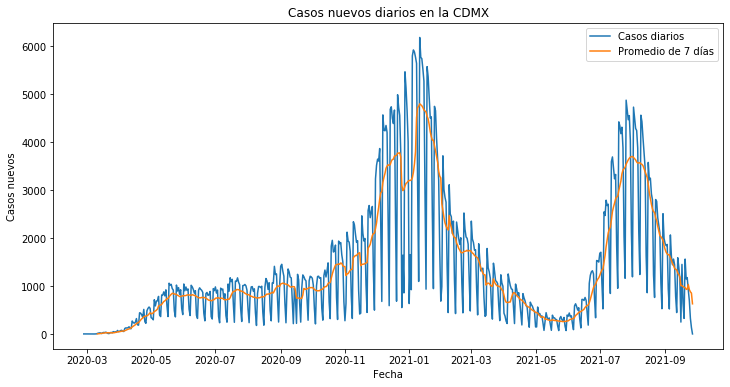

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=casos_nuevos_diarios, x = "FECHA_INGRESO", y="CLASIFICACION_FINAL")
sns.lineplot(data=casos_nuevos_diarios, x="FECHA_INGRESO", y="PROMEDIO_MOVIL")
plt.xlabel("Fecha")
plt.ylabel("Casos nuevos")
plt.title("Casos nuevos diarios en la CDMX")
plt.legend(["Casos diarios", "Promedio de 7 días"])
plt.show()

La gráfica anterior parece mostrar que hay una tendencia a la baja en los contagios nuevos.

In [23]:
casos_nuevos_diarios["CASOS_ACUMULADOS"] = casos_nuevos_diarios["CLASIFICACION_FINAL"].cumsum(axis=0)
casos_nuevos_diarios.head(10)

,FECHA_INGRESO,CLASIFICACION_FINAL,PROMEDIO_MOVIL,CASOS_ACUMULADOS
0,2020-02-27,2,NaN,2
1,2020-03-04,1,NaN,3
2,2020-03-05,1,NaN,4
3,2020-03-07,1,NaN,5
4,2020-03-08,1,NaN,6
5,2020-03-10,3,NaN,9
6,2020-03-11,13,3.142857,22
7,2020-03-12,18,5.428571,40
8,2020-03-13,24,8.714286,64
9,2020-03-14,22,11.714286,86


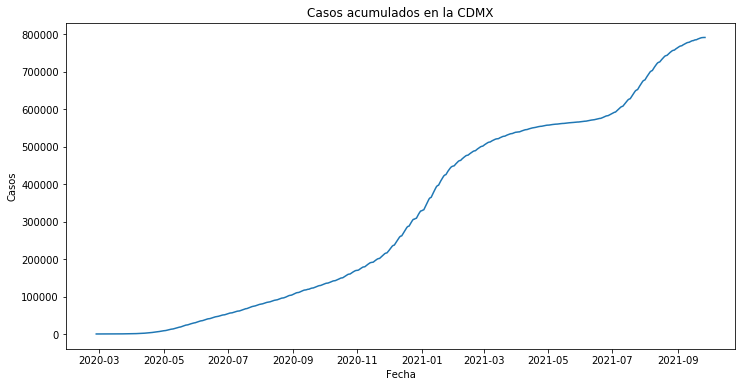

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(data=casos_nuevos_diarios, x = "FECHA_INGRESO", y="CASOS_ACUMULADOS")
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.title("Casos acumulados en la CDMX")
plt.show()

Ahora me interesa estudiar las curvas de defunciones

In [25]:
defunciones_diarias = datos_covid[datos_covid["DEF"]==1].groupby("FECHA_DEF")["DEF"].agg("sum").to_frame()
defunciones_diarias.reset_index(inplace=True)
defunciones_diarias["PROMEDIO_MOVIL"] = defunciones_diarias["DEF"].rolling(window=7).mean()
defunciones_diarias.head(10)

,FECHA_DEF,DEF,PROMEDIO_MOVIL
0,2020-03-22,1,NaN
1,2020-03-23,1,NaN
2,2020-03-25,1,NaN
3,2020-03-26,3,NaN
4,2020-03-27,4,NaN
5,2020-03-28,1,NaN
6,2020-03-29,2,1.857143
7,2020-03-30,4,2.285714
8,2020-03-31,7,3.142857
9,2020-04-01,5,3.714286


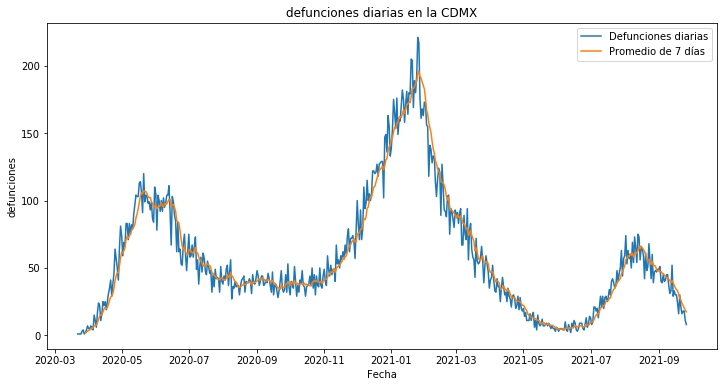

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(data=defunciones_diarias, x = "FECHA_DEF", y="DEF")
sns.lineplot(data=defunciones_diarias, x="FECHA_DEF", y="PROMEDIO_MOVIL")
plt.xlabel("Fecha")
plt.ylabel("defunciones")
plt.title("defunciones diarias en la CDMX")
plt.legend(["Defunciones diarias", "Promedio de 7 días"])
plt.show()

In [27]:
defunciones_diarias["DEF_ACUMULADAS"] = defunciones_diarias["DEF"].cumsum(axis=0)
defunciones_diarias.head()

,FECHA_DEF,DEF,PROMEDIO_MOVIL,DEF_ACUMULADAS
0,2020-03-22,1,NaN,1
1,2020-03-23,1,NaN,2
2,2020-03-25,1,NaN,3
3,2020-03-26,3,NaN,6
4,2020-03-27,4,NaN,10


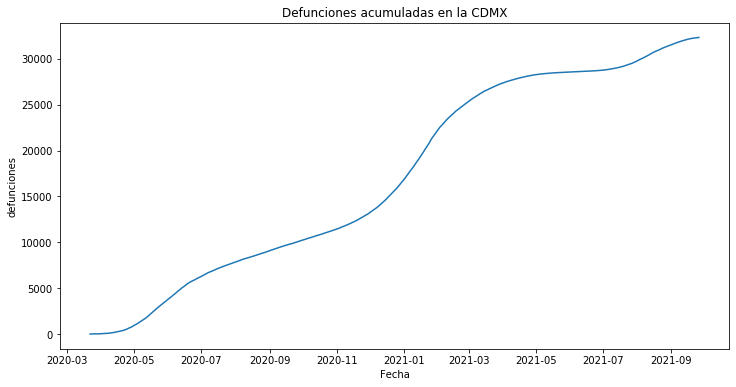

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=defunciones_diarias, x = "FECHA_DEF", y="DEF_ACUMULADAS")
plt.xlabel("Fecha")
plt.ylabel("defunciones")
plt.title("Defunciones acumuladas en la CDMX")
plt.show()

Ahora me interesa estudiar las curvas epidémicas anteriores, pero desagregadas por rango de edad.

In [29]:
def rango_edad(x): # Esto podría hacerse con el método cut de pandas, pero esta partición es muy particular
    """
    Una función que divide en rangos de edad
    """
    if x <= 20:
        rango = "0-20"
    elif x<=40:
        rango = "21-40"
    elif x<= 60:
        rango = "41-60"
    else:
        rango = "60 - +"
    return rango 

In [30]:
datos_covid["RANGO_EDAD"] = datos_covid["EDAD"].apply(rango_edad)

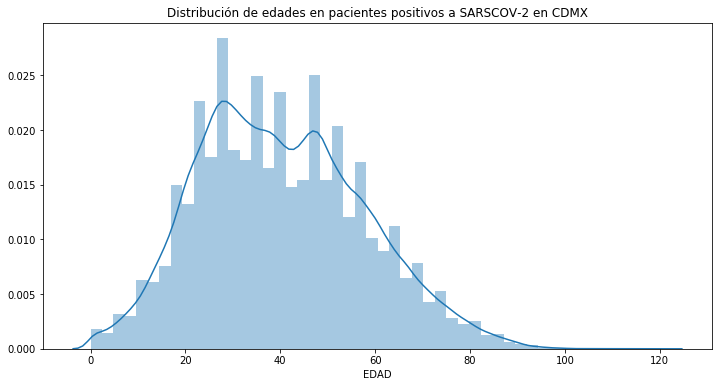

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(datos_covid.EDAD)
plt.title("Distribución de edades en pacientes positivos a SARSCOV-2 en CDMX")
plt.show()

La distribución de edades pareciera ser la mezcla de dos distribuciones normales, con la media de una alrededor de 25 y la media de la otra alrededor de 50.

In [32]:
casos_rango_edad = datos_covid.groupby("RANGO_EDAD")["CLASIFICACION_FINAL"].agg("sum").to_frame()
casos_rango_edad.reset_index(inplace = True)

In [33]:
casos_rango_edad

,RANGO_EDAD,CLASIFICACION_FINAL
0,0-20,97458
1,21-40,322311
2,41-60,264301
3,60 - +,107348


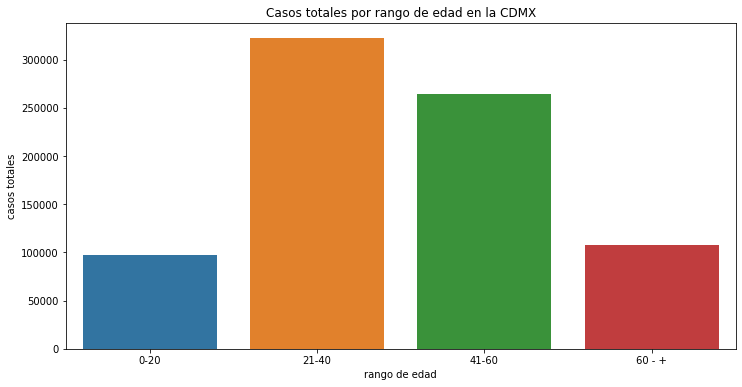

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=casos_rango_edad, x="RANGO_EDAD", y="CLASIFICACION_FINAL")
plt.xlabel("rango de edad")
plt.ylabel("casos totales")
plt.title("Casos totales por rango de edad en la CDMX")
plt.show()

In [35]:
casos_diarios_re = datos_covid.groupby(["FECHA_INGRESO", "RANGO_EDAD"])["CLASIFICACION_FINAL"].agg("sum").to_frame()
casos_diarios_re.reset_index(inplace=True)
casos_diarios_re.head()

,FECHA_INGRESO,RANGO_EDAD,CLASIFICACION_FINAL
0,2020-02-27,21-40,1
1,2020-02-27,41-60,1
2,2020-03-04,21-40,1
3,2020-03-05,41-60,1
4,2020-03-07,0-20,1


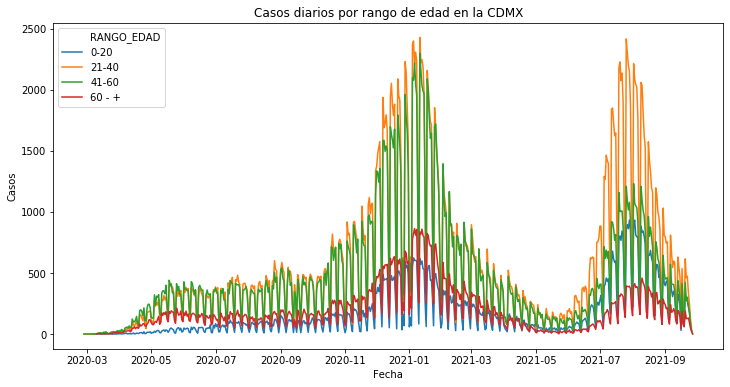

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(data=casos_diarios_re, x = "FECHA_INGRESO", y="CLASIFICACION_FINAL", 
             hue="RANGO_EDAD", hue_order=["0-20", "21-40", "41-60", "60 - +"])
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.title("Casos diarios por rango de edad en la CDMX")
plt.show()

La curva predominante parece ser la del rango de edad de entre 21 y 40 años, seguida por la del rango 41 a 60, después de entre 0 a 20 años y finalmente la de mayores de 60 años. 

Parece ser que a partir de mayo de 2021 hubo un cambio en la tendencia, puesa partir de entonces parece que hay menos casos entre personas mayores de 60 que de entre jovenes menores de 20 años. Este cambio puede ser explicado por la acción de la vacuna.

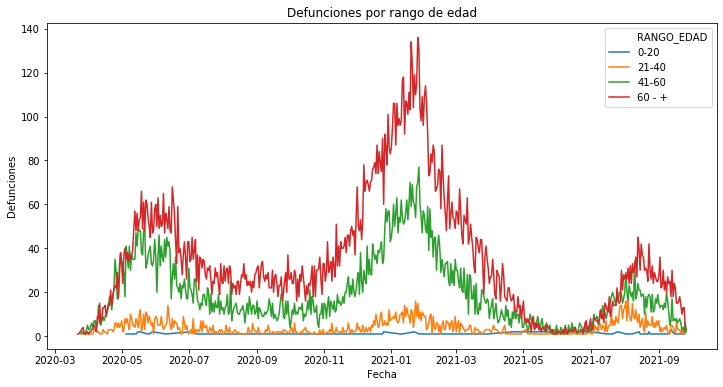

In [37]:
defunciones_diarias_re = datos_covid[datos_covid["DEF"]==1].groupby(["FECHA_DEF", "RANGO_EDAD"])["DEF"].agg("sum").to_frame()
defunciones_diarias_re.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.lineplot(data=defunciones_diarias_re, x = "FECHA_DEF", y="DEF", 
             hue="RANGO_EDAD", hue_order=["0-20", "21-40", "41-60", "60 - +"])
plt.xlabel("Fecha")
plt.ylabel("Defunciones")
plt.title("Defunciones por rango de edad")
plt.show()

En esta gráfica podemos notar que el grupo predominante en las defunciones sigue siendo el de los adultos mayores de 60 años. Aún así, es notoria la disminución en el número de defunciones diarias en ese grupo y en el de 41 a 60 años. Otro (posible) efecto de la vacunación. 

Cabe resaltar también el incremento de defunciones diarias en el grupo de 21 a 40 años, si se compara la segunda gran ola de contagios con la tercera.

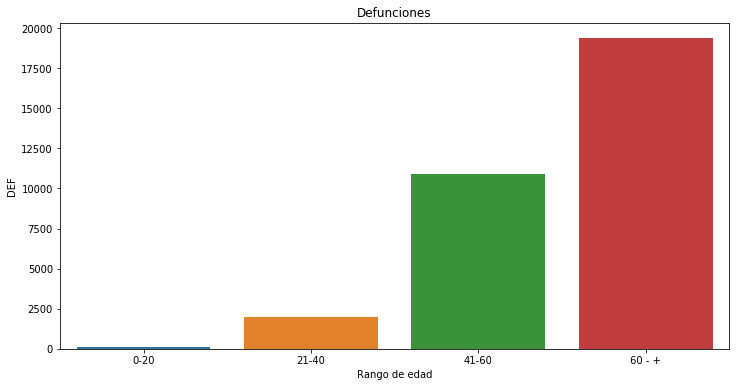

In [39]:
def_rango_edad = datos_covid.groupby("RANGO_EDAD")["DEF"].agg("sum").to_frame()
def_rango_edad.reset_index(inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(data=def_rango_edad, x="RANGO_EDAD", y="DEF")
plt.xlabel("Rango de edad")
plt.title("Defunciones")
plt.show()

Ahora me interesa estudiar cómo influyen las comorbilidades en las probabilidades de fallecer.

In [40]:
comorbilidades = ['DIABETES', 'EPOC', 
                  'ASMA', 'INMUSUPR', 'HIPERTENSION','CARDIOVASCULAR', 
                  'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
comorb_tablas = {}
for nombre in comorbilidades:
    comorb_tablas[nombre] = pd.crosstab(datos_covid[datos_covid[nombre]<=1][nombre], 
                                        datos_covid[datos_covid[nombre]<=1]["DEF"])
    comorb_tablas[nombre] = comorb_tablas[nombre].to_numpy()
    comorb_tablas[nombre] = np.fliplr(comorb_tablas[nombre])
    comorb_tablas[nombre] = np.flipud(comorb_tablas[nombre])

In [41]:
for nombre in comorbilidades:
    print(nombre +":")
    print(comorb_tablas[nombre])
# las columnas, de izquiera a derecha se deben leer como "Falleció la persona/No falleció"
# Las filas deben leerse, de abajo hacia arriba, como "La persona tiene la comorbilidad/No la tiene"

DIABETES:
[[ 10690  61243]
 [ 21485 695828]]
EPOC:
[[  1376   3911]
 [ 30805 753345]]
ASMA:
[[   445  14645]
 [ 31740 742614]]
INMUSUPR:
[[   692   3794]
 [ 31495 753481]]
HIPERTENSION:
[[ 12832  78613]
 [ 19354 678588]]
CARDIOVASCULAR:
[[  1478   7065]
 [ 30710 750241]]
OBESIDAD:
[[  6775  73481]
 [ 25423 683812]]
RENAL_CRONICA:
[[  1915   4284]
 [ 30270 752996]]
TABAQUISMO:
[[  3077  70020]
 [ 29105 687213]]


Ahora realizaré algunos contrastes de hipótesis (más concretamente realizaré pruebas exactas de fisher) para determinar si el hecho de padecer alguna comorbilidad influye en la probabilidad de fallecer. 

Realizaré solo pruebas para las comorbilidades: Diabetes, Asma, Hipertensión

In [42]:
from scipy.stats import fisher_exact
print("(Odds ratio \t, p-valor)")
print(fisher_exact(comorb_tablas["DIABETES"]))

(Odds ratio 	, p-valor)
(5.653114623053566, 0.0)


Dado que el p-valor es muy pequeño, podemos rechazar la hipótesis nula de que las proporciones son las mismas, por lo que hay evidencia de que la diabetes afecta en las probabilidades de una persona con COVID-19 de fallecer.

In [43]:
print("(Odds ratio \t ,\t p-valor)")
print(fisher_exact(comorb_tablas["ASMA"]))

(Odds ratio 	 ,	 p-valor)
(0.7109300063700392, 1.4804527588830338e-13)


In [44]:
print("(Odds ratio \t, p-valor)")
print(fisher_exact(comorb_tablas["HIPERTENSION"]))

(Odds ratio 	, p-valor)
(5.723153835192729, 0.0)


Los p-valores para estas pruebas de hipótesis igualmente indican que hay evidencia para rechazar las hipótesis nulas, por lo que estas comorbilidades afectan a las posibilides de fallecer. 

Lo interesante es que parece que las personas con asma tienen una menor probabilidad de fallecer. Esto lo estudiaré más adelante con otras variables incluídas en el estudio.

Ahora quiero estudiar cuál es la probabilidad condicional de que una persona fallezaca dado que tenga una comorbilidad.

In [45]:
prob_cond = []
for nombre in comorbilidades:
    prob_cond.append(comorb_tablas[nombre][0][0]/comorb_tablas[nombre][0].sum())
    
df_prob_cond = pd.DataFrame({"Comorbilidad": comorbilidades,
                            "prob_cond": prob_cond})
df_prob_cond.sort_values(by="prob_cond", inplace=True, ascending=False)
df_prob_cond

,Comorbilidad,prob_cond
7,RENAL_CRONICA,0.308921
1,EPOC,0.260261
5,CARDIOVASCULAR,0.173007
3,INMUSUPR,0.154258
0,DIABETES,0.148611
4,HIPERTENSION,0.140325
6,OBESIDAD,0.084417
8,TABAQUISMO,0.042095
2,ASMA,0.029490


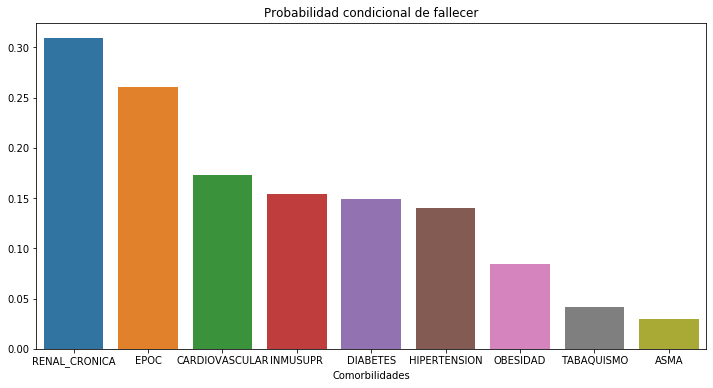

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_prob_cond, x="Comorbilidad", y="prob_cond")
plt.xlabel("Comorbilidades")
plt.ylabel("")
plt.title("Probabilidad condicional de fallecer")
plt.show()

En la gráfica anterior es posible ver que las personas con enfermedad renal crónica parecen tener una mayor probabilidad de fallecer, seguidos por aquellos con enfermedad pulmonar obstructiva crónica. Por otro lado, las personas que tienen menor probabilidad de fallecer son las personas con asma.

Lo siguiente que me interesa estudiar es la distribución de los días que tarda una persona en acudir a consulta desde que tiene sintomas, así como la distribución de los días que tarda una persona en fallecer desde que tiene síntomas y desde que acude a consulta.

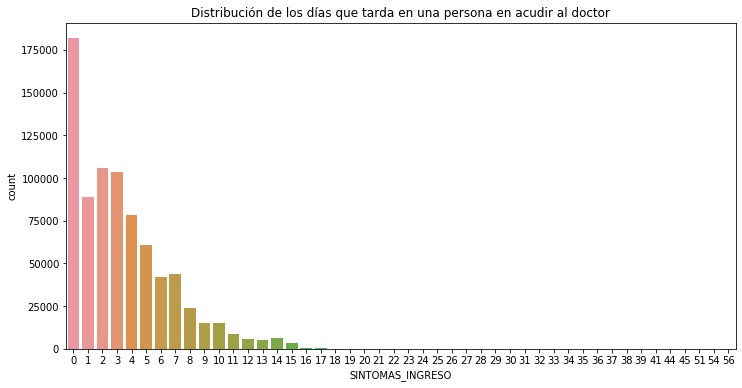

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(datos_covid.SINTOMAS_INGRESO)
plt.title("Distribución de los días que tarda una persona en acudir al doctor")
plt.show()

In [58]:
sintomas_ingreso_odds = datos_covid.groupby("SINTOMAS_INGRESO")[["DEF","CLASIFICACION_FINAL"]].agg("sum")
sintomas_ingreso_odds.reset_index(inplace=True)
sintomas_ingreso_odds["p"] = sintomas_ingreso_odds["DEF"]/sintomas_ingreso_odds["CLASIFICACION_FINAL"]
sintomas_ingreso_odds["1-p"] = 1 - sintomas_ingreso_odds["p"]
sintomas_ingreso_odds["odds"] = sintomas_ingreso_odds["p"]/sintomas_ingreso_odds["1-p"]
sintomas_ingreso_odds = sintomas_ingreso_odds[sintomas_ingreso_odds["SINTOMAS_INGRESO"]<=40]


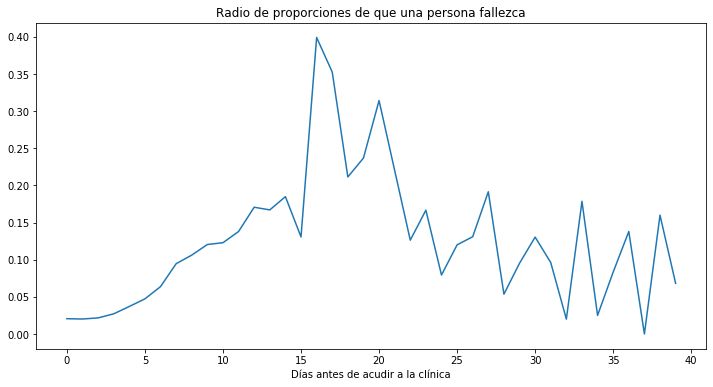

In [57]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sintomas_ingreso_odds, x="SINTOMAS_INGRESO", y="odds")
plt.title("Radio de proporciones de que una persona fallezca")
plt.xlabel("Días antes de acudir a la clínica")
plt.ylabel("")
plt.show()

En la gráfica anterior se puede notar, dentro de los primeros quince días, que la probabilidad de fallecer dado que una persona tardó cierto tiempo en acudir a la clínica parece aumentar. Porterior a esto hay un decenso, pero este varía mucho. 

Posibles explicaciones al aumento de la probabilidad de fallecer dentro de los primeros quince días y después empiezan a descender:
- Mientras más tiempo tarde una persona en acudir a la clínica, las probabilidades de que la enfermedad se complique aumentan.  
- Desmpués de quince días, el periodo normal de enfermedad ha terminado, por lo que las personas que hann tardado más de quince días en acudir a la clínica probablemente ya se encuentre recuperadas.

Antes se analizó si la presencia de ciertas comorbilidades afectan a las probabilidades de fallecer. En el estudio surgió la teoría de que las personas con asma parecen tener menos probabilidades de fallecer, hecho curioso por ser una enfermedad que afecta al sistema respiratorio. Una posible explicación a esto sería que las personas con asma tardan menos días en acudir a la clínica que las personas que no tienen asma.

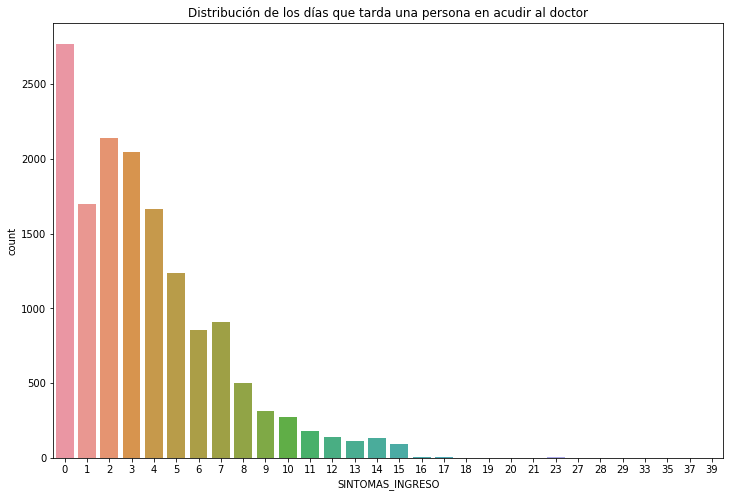

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(datos_covid[datos_covid["ASMA"]==1].SINTOMAS_INGRESO)
plt.title("Distribución de los días que tarda una persona en acudir al doctor")
plt.show()

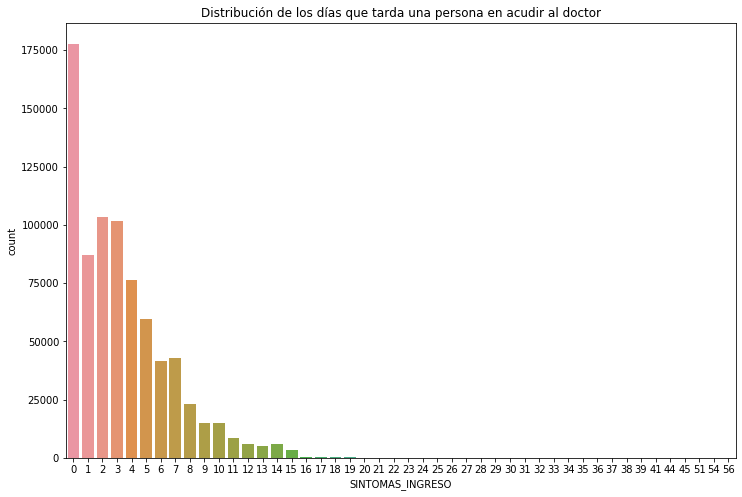

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(datos_covid[datos_covid["ASMA"]==0].SINTOMAS_INGRESO)
plt.title("Distribución de los días que tarda una persona en acudir al doctor")
plt.show()

In [ ]:
# Hacer un contraste de hipótesis de la media de días que tardan en acudir a la clínica las personas asmáticas y las no asmáticas